# Logistic Regression with Python

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the Dataset 

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!



## Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!



In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


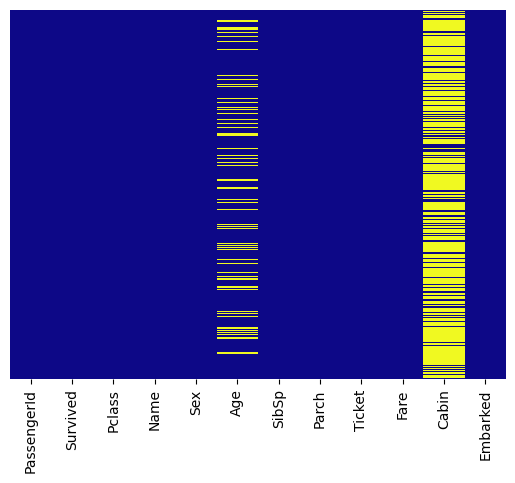

In [5]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')
plt.show()

About 20% of `'Age'`is missing — okay to fill with imputation. <br>
`'Cabin'`has too many missing values — might drop it or turn into 'Cabin Known' (1/0). 


In [6]:
# Age null count 
df.isnull()['Age'].sum()

177

In [7]:
# Cabin null count 
df.isnull()['Cabin'].sum()

687

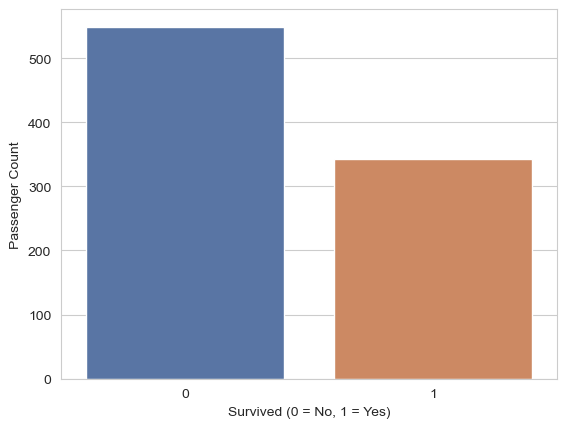

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, hue='Survived', palette='deep',legend = False)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()
# hue='Survived': This means color the bars based on the categories of the 'Survived' column.

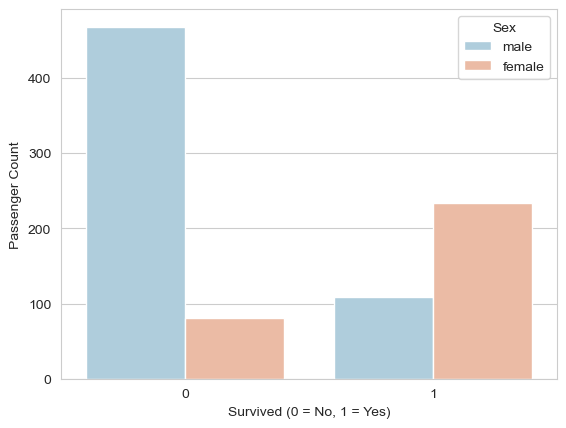

In [9]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue ='Sex', data = df, palette='RdBu_r')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()

In [10]:
df.groupby('Pclass').nunique()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,2,216,2,57,4,4,147,94,133,3
2,184,2,184,2,57,4,4,140,42,7,3
3,491,2,491,2,68,7,7,394,119,7,3


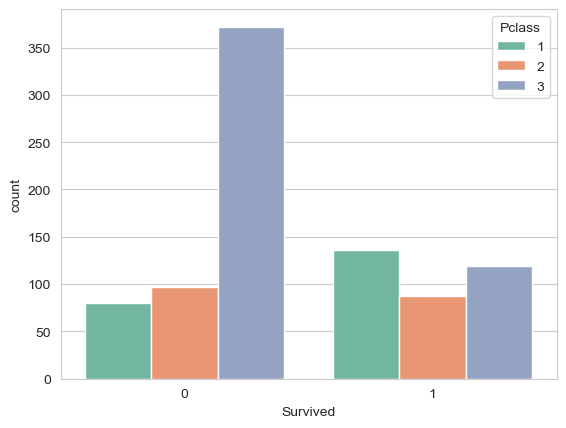

In [11]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = df, palette = 'Set2')
plt.show()

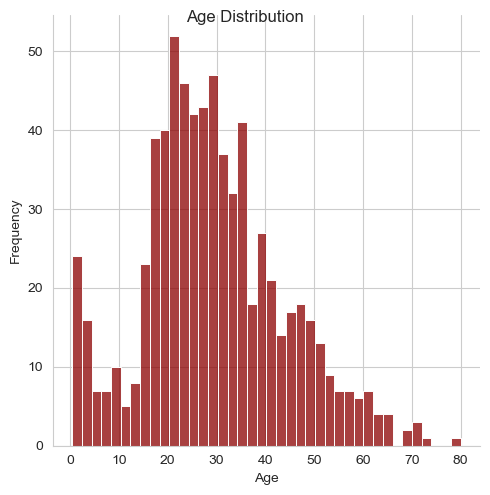

In [12]:
g = sns.displot(df['Age'].dropna(),kde = False, color = 'darkred',bins = 40)
g.fig.suptitle("Age Distribution")
g.set_axis_labels("Age", "Frequency")
g.fig

In [13]:
df.groupby('SibSp').nunique()


,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
SibSp,,,,,,,,,,,
0,608,2,3,608,2,81,6,555,191,102,3
1,209,2,3,209,2,57,7,144,102,45,3
2,28,2,3,28,2,18,4,19,18,4,3
3,16,2,3,16,2,11,3,6,6,1,1
4,18,2,1,18,2,13,2,5,5,0,2
5,5,1,1,5,2,5,1,1,1,0,1
8,7,1,1,7,2,0,1,1,1,0,1


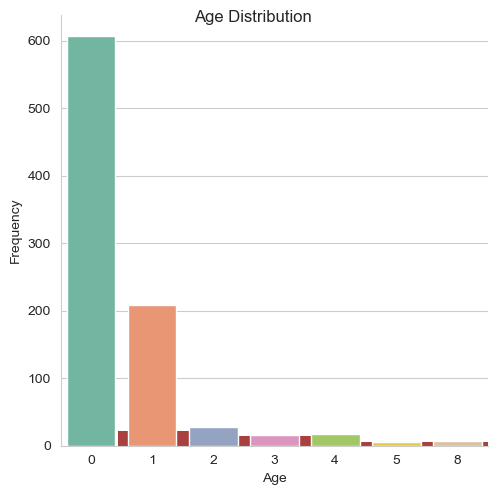

In [14]:

f = sns.countplot(x='SibSp', data=df,palette='Set2', legend = False, hue = 'SibSp')
f.figure 

In [15]:
plt.clf()

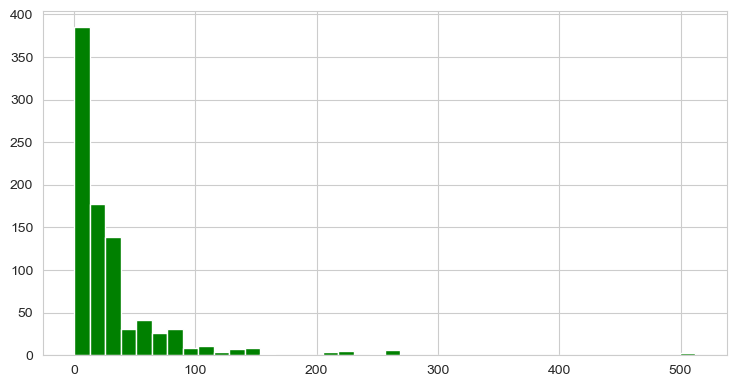

In [16]:
a = df['Fare'].hist(color='green', bins=40, figsize=(8, 4))
plt.show()


### Cufflinks for plots
Let's take a quick moment to show an example of cufflinks!


### Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

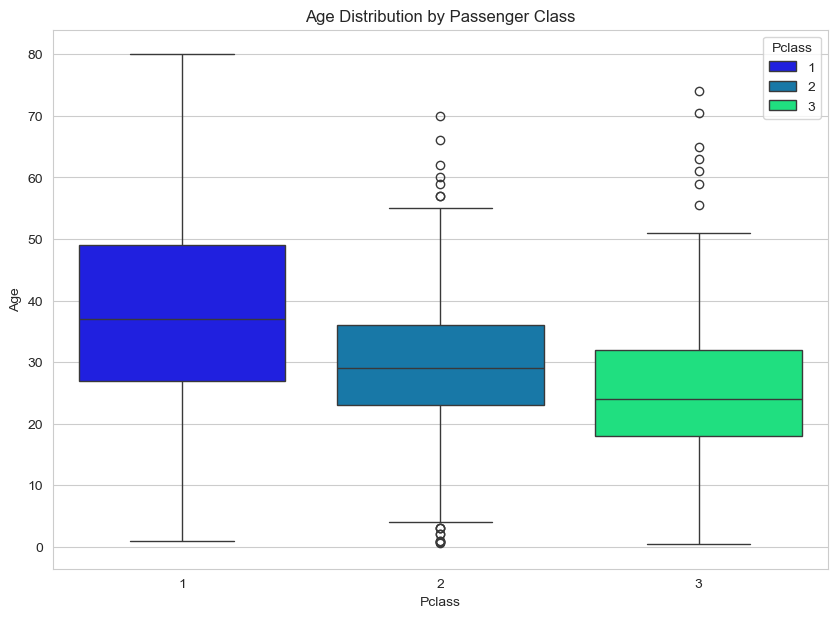

In [17]:

plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter',hue ='Pclass')
plt.title('Age Distribution by Passenger Class')
plt.show()


We can see that `pclass = 1'`  tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.
older 
`pclass = 1'` > `pclass = 2'`>`pclass = 3'`

In [18]:

def age_impute(cols):
    Age,Pclass = cols
                                #     Age = cols[0]
                                #     Pclass = cols[1]
    if pd.isnull(Age):
     
      if Pclass == 1:
          return 37
         
      elif Pclass == 2:
          return 29

      else:
          return 24
    else:
      return Age
     
     





In [19]:
df['Age'] = df[['Age','Pclass']].apply(age_impute, axis = 1)

Now let's check that heat map again!



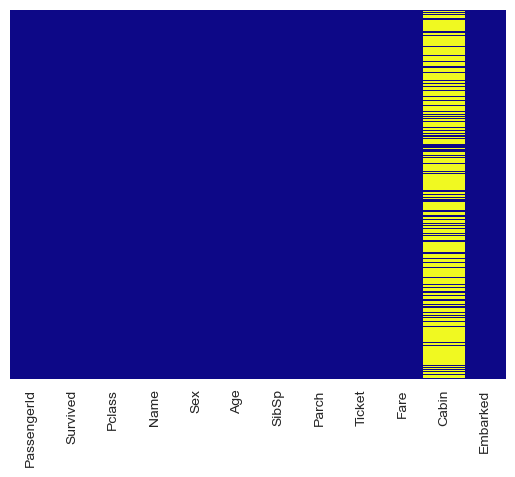

In [20]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')
plt.show()

In [21]:
df.isnull()['Embarked'].count()

891

In [22]:
df.drop('Cabin', axis = 1, inplace = True)

In [23]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


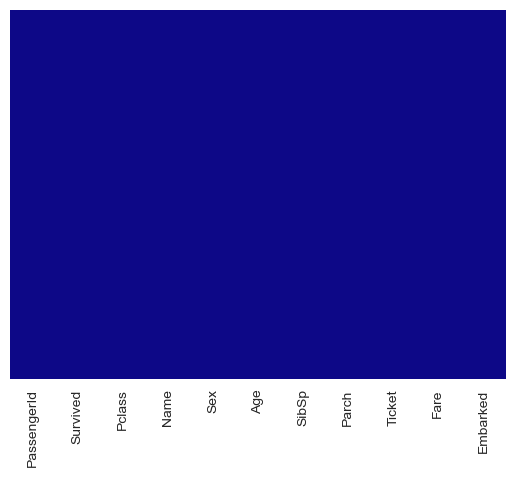

In [25]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'plasma')
plt.show()

So the cabin column is gone 

In [26]:
df.dropna(inplace=True)

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C



## Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [29]:
pd.get_dummies(df['Embarked'], drop_first = True).astype(int).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [30]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first = True)

In [31]:
df.drop(['Sex','Embarked','Name','Ticket'],axis = 1 , inplace = True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [33]:
df = pd.concat([df, sex, embark],axis = 1).astype(int)


In [34]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22,1,0,7,1,0,1
1,2,1,1,38,1,0,71,0,0,0
2,3,1,3,26,0,0,7,0,0,1
3,4,1,1,35,1,0,53,0,0,1
4,5,0,3,35,0,0,8,1,0,1


# Building a Logistic Regression model
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

### Train Test Split


In [35]:
X= df.drop('Survived', axis =1 )
X.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22,1,0,7,1,0,1
1,2,1,38,1,0,71,0,0,0
2,3,3,26,0,0,7,0,0,1
3,4,1,35,1,0,53,0,0,1
4,5,3,35,0,0,8,1,0,1


In [36]:
y = df['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int32

In [37]:

from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)
# train_test_split(X, y, test_size=0.3, random_state=101)


In [39]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,808,3,18,0,0,7,0,0,1
651,652,2,18,0,1,23,0,0,1
2,3,3,26,0,0,7,0,0,1
690,691,1,31,1,0,57,1,0,1
196,197,3,24,0,0,7,1,1,0
...,...,...,...,...,...,...,...,...,...
576,577,2,34,0,0,13,0,0,1
840,841,3,20,0,0,7,1,0,1
338,339,3,45,0,0,8,1,0,1
524,525,3,24,0,0,7,1,0,0


In [40]:
X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,512,3,24,0,0,8,1,0,1
613,614,3,24,0,0,7,1,1,0
615,616,2,24,1,2,65,0,0,1
337,338,1,41,0,0,134,0,0,0
718,719,3,24,0,0,15,1,1,0
...,...,...,...,...,...,...,...,...,...
792,793,3,24,8,2,69,0,0,1
828,829,3,24,0,0,7,1,1,0
732,733,2,29,0,0,0,1,0,1
669,670,1,37,1,0,52,0,0,1


In [41]:
y_train

807    0
651    1
2      1
690    1
196    0
      ..
576    1
840    0
338    1
524    0
865    1
Name: Survived, Length: 622, dtype: int32

In [42]:
y_test

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int32

## Training and Predicting


In [43]:
from sklearn.linear_model import LogisticRegression


In [44]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\rmahf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_predictions = model.predict(X_test)

In [46]:
y_predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1])

In [47]:
model.score(X_test,y_test)

0.8052434456928839

In [48]:
from sklearn.metrics import accuracy_score


In [49]:

accuracy=accuracy_score(y_test,y_predictions )
accuracy

0.8052434456928839


## Evaluation
We can check precision,recall,f1-score using classification report!

In [50]:
from sklearn.metrics import classification_report 

In [52]:
result = classification_report(y_test, y_predictions)
print(result)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.64      0.72       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

